<a href="https://colab.research.google.com/github/juangombra2093/Ejercicios_IICD/blob/EDA/Limpieza_Viz-CARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3: Limpieza datos, visualización y análisis**
Realizado por: Juan Pablo Gómez Bravo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("USA_cars_datasets.csv",index_col = 0)
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


**1. ¿Cuáles son los estados donde se aproxima al 80% la concentración de los autos? Para listarlos utiliza un diagrama Pareto.**

In [ ]:
#value counts
freqTable = pd.DataFrame(df["state"].value_counts()).reset_index()
freqTable.columns = ["state","count"]
freqTable

,state,count
0,pennsylvania,299
1,florida,246
2,texas,214
3,california,190
4,michigan,169
5,north carolina,146
6,minnesota,119
7,illinois,113
8,wisconsin,94
9,virginia,90


In [ ]:
#pareto
freqTable["cum_perce"] = freqTable["count"].cumsum() / freqTable["count"].sum() * 100
freqTable

,state,count,cum_perce
0,pennsylvania,299,11.964786
1,florida,246,21.808723
2,texas,214,30.372149
3,california,190,37.975190
4,michigan,169,44.737895
5,north carolina,146,50.580232
6,minnesota,119,55.342137
7,illinois,113,59.863946
8,wisconsin,94,63.625450
9,virginia,90,67.226891


In [ ]:
#seleccionar estados donde se acumula el 80%
pareto_state = freqTable[freqTable["cum_perce"]<=80]
pareto_state

,state,count,cum_perce
0,pennsylvania,299,11.964786
1,florida,246,21.808723
2,texas,214,30.372149
3,california,190,37.975190
4,michigan,169,44.737895
5,north carolina,146,50.580232
6,minnesota,119,55.342137
7,illinois,113,59.863946
8,wisconsin,94,63.625450
9,virginia,90,67.226891


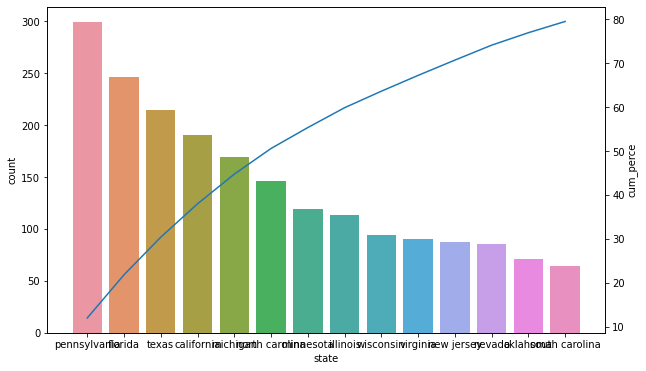

In [ ]:
 #Diagrama de Pareto
fig, ax1 = plt.subplots(figsize = (10, 6))
ax1 = sns.barplot(x = "state" , y = "count" , data=pareto_state)
ax2 = ax1.twinx()

ax2 = sns.lineplot(x="state" , y="cum_perce", data=pareto_state, sort=False)
plt.show()

**2. ¿Cuál es el año que más se repite? Utiliza un gráfico de barras.**

In [ ]:
#value counts
freqTable2 = pd.DataFrame(df["year"].value_counts()).reset_index()
freqTable2.columns = ["year","count"]
freqTable2

,year,count
0,2019,892
1,2018,395
2,2017,377
3,2016,203
4,2015,196
5,2014,104
6,2013,86
7,2012,72
8,2020,48
9,2011,23


[Text(0, 0, '1973'),
 Text(0, 0, '1984'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

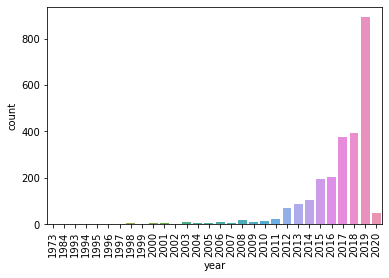

In [ ]:
barplot2 = sns.barplot(x = "year" , y= "count", data = freqTable2)
barplot2.set_xticklabels(barplot2.get_xticklabels(),rotation = 90)

In [ ]:
#el año que mas se repite es el 2019

**3. Convierte la variable [condition] en una variable entera, removiendo el texto.**

In [ ]:
df2 = df
df2.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
#valores unicos
list1 = df2["condition"]
np.unique(list1) 

array(['1 days left', '1 hours left', '1 minutes', '10 days left',
       '11 days left', '12 days left', '12 hours left', '13 days left',
       '14 hours left', '15 days left', '15 hours left', '16 hours left',
       '16 minutes', '17 hours left', '18 hours left', '19 hours left',
       '2 days left', '2 hours left', '20 hours left', '21 hours left',
       '22 hours left', '23 hours left', '24 hours left', '27 minutes',
       '28 minutes', '29 minutes', '3 days left', '3 hours left',
       '30 minutes', '32 minutes', '34 minutes', '36 minutes',
       '4 days left', '4 hours left', '47 minutes', '48 minutes',
       '5 days left', '5 hours left', '53 minutes', '6 days left',
       '6 hours left', '7 days left', '7 hours left', '8 days left',
       '9 days left', '9 minutes', 'Listing Expired'], dtype=object)

In [ ]:
df4 = df2[df2["condition"] != 'Listing Expired']
df4.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
list2 = df4["condition"]
order1 = np.unique(list2) 

In [ ]:
order1.sort()
order1

array(['1 days left', '1 hours left', '1 minutes', '10 days left',
       '11 days left', '12 days left', '12 hours left', '13 days left',
       '14 hours left', '15 days left', '15 hours left', '16 hours left',
       '16 minutes', '17 hours left', '18 hours left', '19 hours left',
       '2 days left', '2 hours left', '20 hours left', '21 hours left',
       '22 hours left', '23 hours left', '24 hours left', '27 minutes',
       '28 minutes', '29 minutes', '3 days left', '3 hours left',
       '30 minutes', '32 minutes', '34 minutes', '36 minutes',
       '4 days left', '4 hours left', '47 minutes', '48 minutes',
       '5 days left', '5 hours left', '53 minutes', '6 days left',
       '6 hours left', '7 days left', '7 hours left', '8 days left',
       '9 days left', '9 minutes'], dtype=object)

In [ ]:
#separamos el valor continuo de la variable [condition]
df4["time_condition"] = df4["condition"].map(lambda x:x.split(" ")[0])
df4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,time_condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,10
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,6
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,22


In [ ]:
#separamos el valor de la dimensión de la variable de la variable [condition]
df4["condition_range"] = df4["condition"].map(lambda x:x.split(" ")[1])
df4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,time_condition,condition_range
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,10,days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,6,days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2,days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22,hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,22,hours


In [ ]:
np.unique(df4["time_condition"])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '27', '28', '29', '3', '30',
       '32', '34', '36', '4', '47', '48', '5', '53', '6', '7', '8', '9'],
      dtype=object)

In [ ]:
np.unique(df4["condition_range"])

array(['days', 'hours', 'minutes'], dtype=object)

In [ ]:
#value counts
freq_b = pd.DataFrame(df4["condition_range"].value_counts()).reset_index()
freq_b.columns = ["condition_range","count"]
freq_b

,condition_range,count
0,days,1395
1,hours,1030
2,minutes,54


In [ ]:
#pasaremos ["time_condition"] a ["und_days"].

In [ ]:
df4["und_days"] = df4["condition_range"]
df4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,time_condition,condition_range,und_days
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,10,days,days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,6,days,days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2,days,days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22,hours,hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,22,hours,hours


In [ ]:
df4["und_days"] = df4["und_days"].replace(["days"], 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4["und_days"] = df4["und_days"].replace(["hours"], 24)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4["und_days"] = df4["und_days"].replace(["minutes"], 1440)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,time_condition,condition_range,und_days
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,10,days,1
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,6,days,1
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2,days,1
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22,hours,24
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,22,hours,24


In [ ]:
df4.dtypes

price                int64
brand               object
model               object
year                 int64
title_status        object
mileage            float64
color               object
vin                 object
lot                  int64
state               object
country             object
condition           object
time_condition      object
condition_range     object
und_days             int64
dtype: object

In [ ]:
df4["time_condition"].astype(int)

0       10
1        6
2        2
3       22
4       22
        ..
2494     1
2495    21
2496    21
2497     2
2498    21
Name: time_condition, Length: 2479, dtype: int64

In [ ]:
#con ["time_condition_dist"] llevamos todas las unidades de [condition] a dias y podemos continuar con los analisis.
df4["time_condition_dist"] = (df4["time_condition"].astype(int) / df4["und_days"])
df4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,time_condition,condition_range,und_days,time_condition_dist
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,10,days,1,10.000000
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,6,days,1,6.000000
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2,days,1,2.000000
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22,hours,24,0.916667
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,22,hours,24,0.916667


In [ ]:
df4.dtypes

price                    int64
brand                   object
model                   object
year                     int64
title_status            object
mileage                float64
color                   object
vin                     object
lot                      int64
state                   object
country                 object
condition               object
time_condition          object
condition_range         object
und_days                 int64
time_condition_dist    float64
dtype: object

# **4. Crea un histograma de la variable [condition] y encuentra sus medidas: Media, Mediana, Desviación Estándar, Cuartiles, Asimetría y Curtosis.**
En mi caso [time_condition_dist]

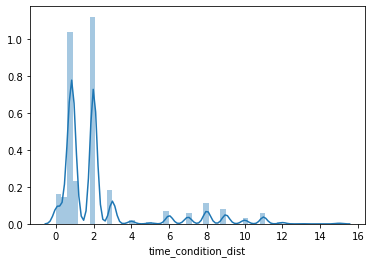

In [ ]:
#analisis de distirbución de variable Condition en dias.
sns.distplot(df4["time_condition_dist"])

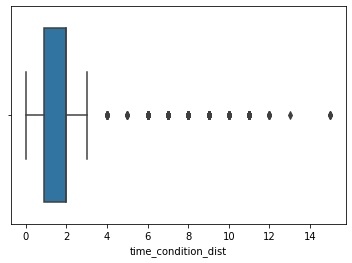

In [ ]:
#Box plot
ax = sns.boxplot(df4["time_condition_dist"])

In [ ]:
#media
condition_media = df4["time_condition_dist"].mean()
#mediana
condition_median = df4["time_condition_dist"].median()
#desviación estandar
condition_desv = df4["time_condition_dist"].std()
#cuartiles
condition_cuartiles = df4["time_condition_dist"].quantile([0.25, 0.5, 0.75])
#asimetría
condition_asimetria = df4["time_condition_dist"].skew()
#curtosis
condition_curtosis = df4["time_condition_dist"].kurtosis()

print("el valor de la media es:",condition_media)
print("el valor de la mediana es:",condition_median)
print("el valor de la desviación estandar es:",condition_desv)
print("los valores de los cuartiles son: \n",condition_cuartiles)
print("el coeficiente de asimetria es:",condition_asimetria)
print("el coeficiente de curtosis es:",condition_curtosis)


el valor de la media es: 2.3012510644973267
el valor de la mediana es: 2.0
el valor de la desviación estandar es: 2.549303147348149
los valores de los cuartiles son: 
 0.25    0.875
0.50    2.000
0.75    2.000
Name: time_condition_dist, dtype: float64
el coeficiente de asimetria es: 2.1948716339482828
el coeficiente de curtosis es: 4.195857648433552


# **5.Contesta las siguientes preguntas sobre la variable [condition]:**


5.1. ¿La variable sigue una distribución simétrica? : No para nada, de hecho se encuentra muy sesgada a derecha, quiza limpiando los valores atipicos se podria mover un poco mas hacia izquierda-.


5.2. ¿La distribución es apuntada, achatada o es normal (mesocúrtica)? Es una distribución apuntalda y con dos picos de concentración de datos.

5.3. ¿Que porcentaje de la población se encuentra entre una desviación estándar por debajo de la media y una desviación estándar por arriba de la media?

In [ ]:
condition_sub = df4["time_condition_dist"]
bins = np.arange(condition_media - 1 * condition_desv, condition_media + 1 * condition_desv + condition_desv, condition_desv)
binned = pd.cut(condition_sub, bins, include_lowest = True)
binned.fillna(binned[0], inplace = True)



In [ ]:
freqTable5 = pd.DataFrame(binned.value_counts()).reset_index()
freqTable5.columns = ["rango", "Condition"]
freqTable5

,rango,Condition
0,"(-0.249, 2.301]",2007
1,"(2.301, 4.851]",153


In [ ]:
#porcentaje acumulado
freqTable5["cum_perce"] = freqTable5["Condition"].cumsum() / freqTable5["Condition"].sum() * 100
freqTable5

,rango,Condition,cum_perce
0,"(-0.249, 2.301]",2007,92.916667
1,"(2.301, 4.851]",153,100.000000


In [ ]:
#El 92,9% de los datos estan por debajo de la media 1 desviación estandar
#El 7,!% de los datos estan por enciama de la media 1 desviación estandar